### Problem statment 
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts. 

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


In [1]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#train dataset (r"D:\HR Attrition Rate.csv")
train=pd.read_csv(r"D:\Malignant\train.csv")#Creating the dataframe 
train.head()  #Checking the first 5 rows of the dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Unnamed: 8
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,NaN
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,NaN
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,NaN
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,NaN
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,NaN


In [4]:
train.shape

(38831, 9)

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38831 entries, 0 to 38830
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                38831 non-null  object 
 1   comment_text      38831 non-null  object 
 2   malignant         38831 non-null  object 
 3   highly_malignant  38831 non-null  int64  
 4   rude              38831 non-null  int64  
 5   threat            38831 non-null  int64  
 6   abuse             38831 non-null  int64  
 7   loathe            38831 non-null  int64  
 8   Unnamed: 8        1 non-null      float64
 9   length            38831 non-null  int64  
 10  clean_length      38831 non-null  int64  
 11  bad               38831 non-null  int32  
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 3.4+ MB


In [6]:
#test dataset
test=pd.read_csv(r"D:\Malignant\test.csv",encoding='ISO-8859-1') #Creating the dataframe
#So ISO-8859-1 Unicode points 0–255 are identical to the Latin-1 values, so converting to this encoding simply requires converting code points to byte values; if a code point larger than 255 is encountered,the string can’t be encoded into Latin-1
test.head() #Checking the first 5 rows of the test dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
print('train shape is ',train.shape) #shape of the train dataset
print('test shape is ',test.shape) #shape of the test dataset

train shape is  (38831, 9)
test shape is  (153164, 2)


In [8]:
print('test info',test.info) #information of the test dataset

test info <bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>


In [9]:
#Statistical summary of the train dataset
train.describe()


,highly_malignant,rude,threat,abuse,loathe,Unnamed: 8
count,38831.000000,38831.000000,38831.000000,38831.000000,38831.000000,1.0
mean,0.009786,0.052458,0.002987,0.049728,0.009322,0.0
std,0.098440,0.222952,0.054575,0.217386,0.096103,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [10]:
#Statistical summary of the test dataset
test.describe()


,id,comment_text
count,153164,153164
unique,153164,153027
top,00001cee341fdb12,#NAME?
freq,1,126


id                      0
comment_text            0
malignant               0
highly_malignant        0
rude                    0
threat                  0
abuse                   0
loathe                  0
Unnamed: 8          38830
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


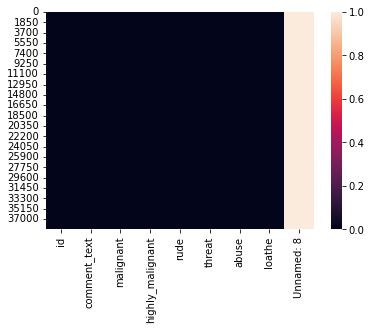

In [11]:
# Checking null values if any
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

#### No null values are present in the train dataset.



In [12]:
#Checking correlation in the train dataset
train.corr()

,highly_malignant,rude,threat,abuse,loathe,Unnamed: 8
highly_malignant,1.000000,0.400209,0.114399,0.371991,0.235356,NaN
rude,0.400209,1.000000,0.137395,0.743217,0.293287,NaN
threat,0.114399,0.137395,1.000000,0.148112,0.127266,NaN
abuse,0.371991,0.743217,0.148112,1.000000,0.351323,NaN
loathe,0.235356,0.293287,0.127266,0.351323,1.000000,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

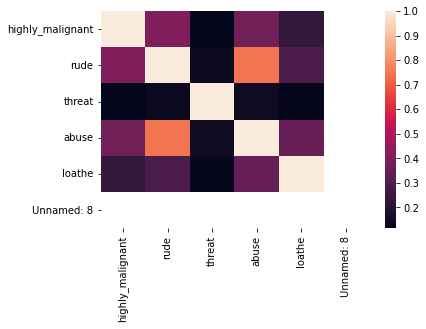

In [13]:
sns.heatmap(train.corr()) #Checking correlation using heatmap


In [14]:
#Checking the skewness for the features:
train.skew()

highly_malignant     9.960140
rude                 4.014903
threat              18.214791
abuse                4.142816
loathe              10.212023
Unnamed: 8                NaN
dtype: float64

##### The above columns are categorical in nature,so we dont need to remove skewness.



malignant


0                                                                                                                             35094
1                                                                                                                              3736
Yes, I find it very uncivil and annoying that you sneak up on me like that! Sorry, but it has nothing to do with trolling!        1
Name: malignant, dtype: int64


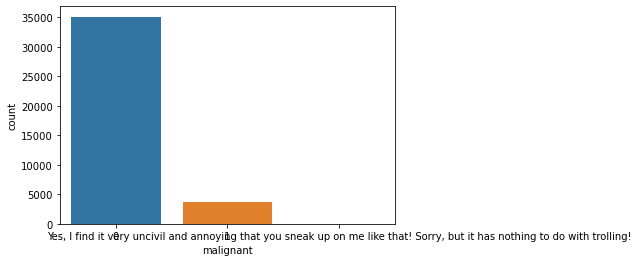

highly_malignant


0    38451
1      380
Name: highly_malignant, dtype: int64


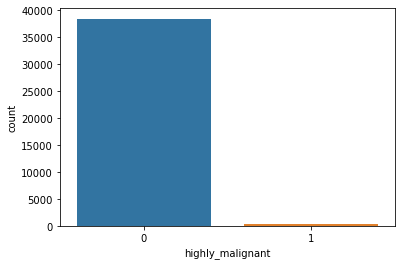

rude


0    36794
1     2037
Name: rude, dtype: int64


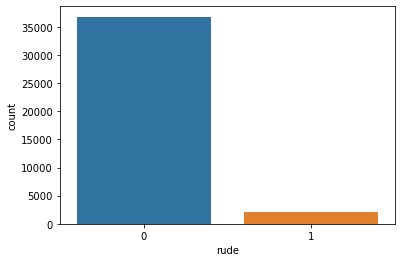

threat


0    38715
1      116
Name: threat, dtype: int64


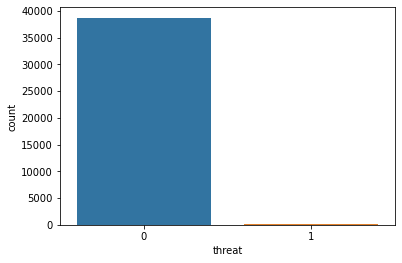

abuse


0    36900
1     1931
Name: abuse, dtype: int64


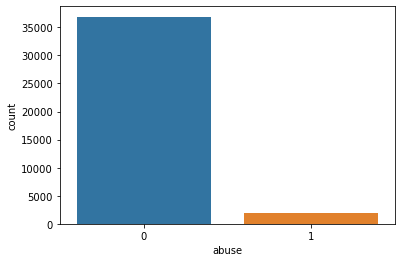

loathe


0    38469
1      362
Name: loathe, dtype: int64


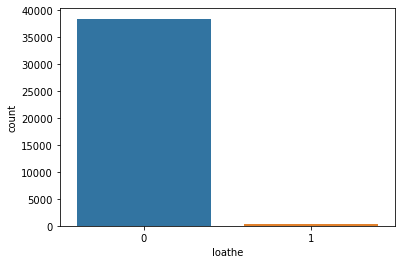

In [15]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()


In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [17]:
train['length'] = train['comment_text'].str.len()
train.head(4)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Unnamed: 8,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,NaN,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,NaN,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,NaN,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,NaN,622


In [18]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

In [20]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

    

In [21]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Unnamed: 8,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,NaN,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,NaN,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,NaN,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,NaN,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,NaN,67,47


In [22]:
#Total length removal
print ('Origin Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origin Length 15291398
Clean Length 10588115


In [23]:
! pip install wordcloud


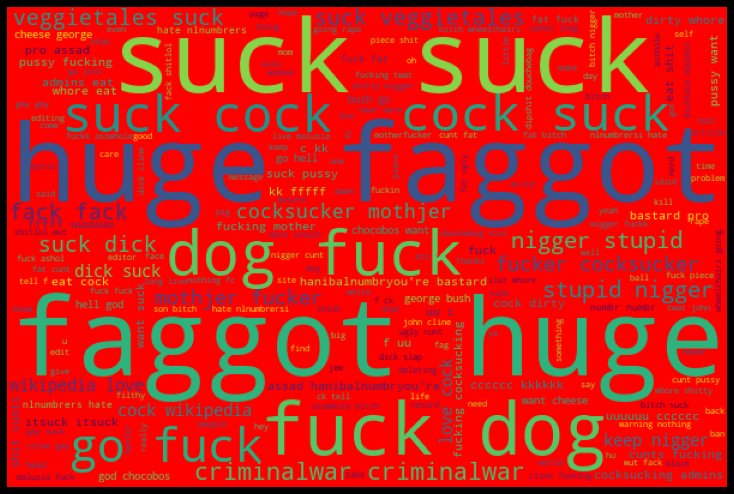

In [24]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='Red',max_words=200).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

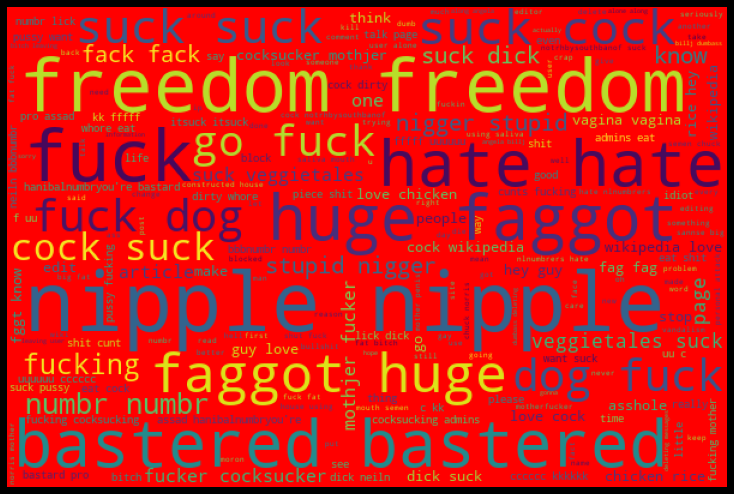

In [25]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='Red',max_words=200).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

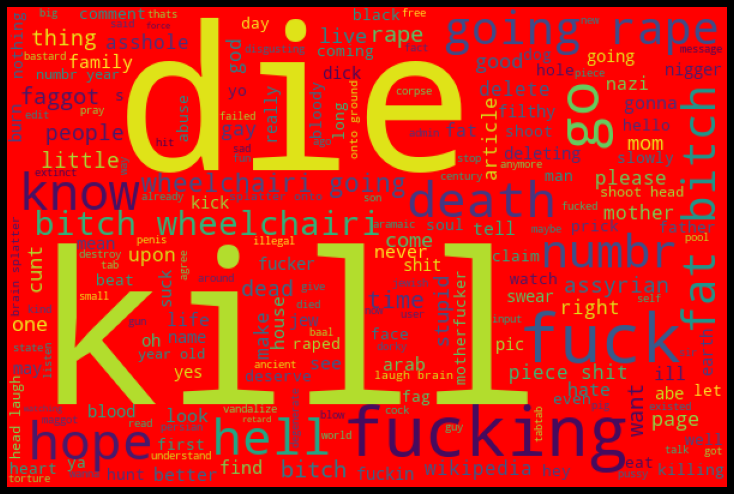

In [26]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='Red',max_words=200).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

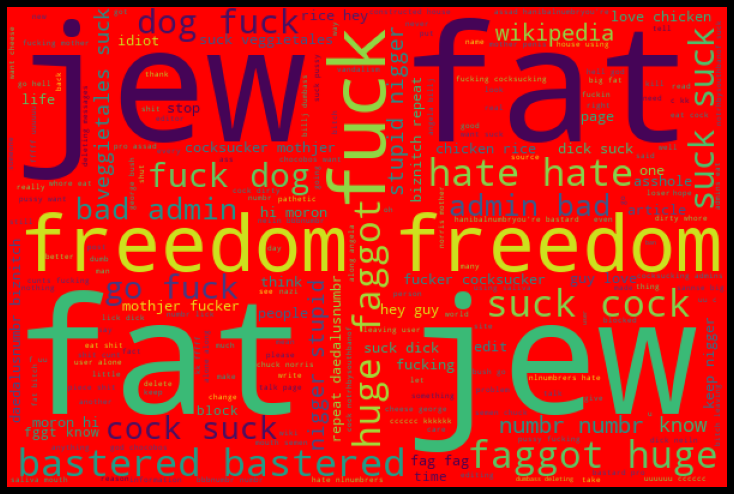

In [27]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='Red',max_words=200).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

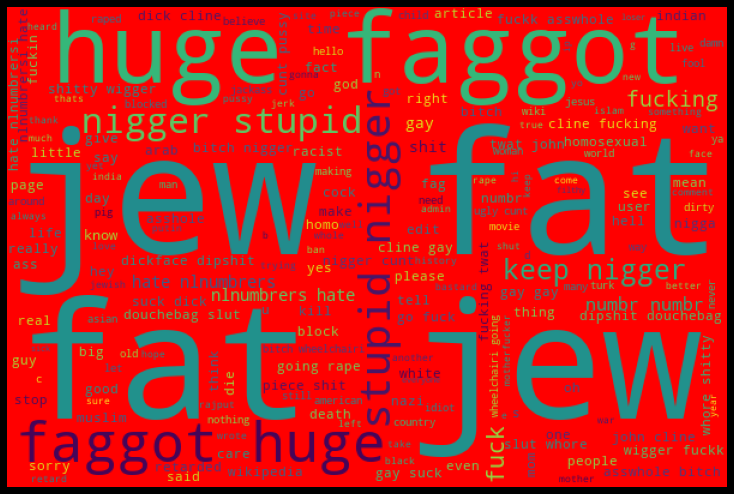

In [28]:

#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='Red',max_words=200).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [29]:
#Importing necessary libraries and the algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [30]:
train.sample(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Unnamed: 8,length,clean_length
17671,49b57d8403a2b97f,sorry vandalism ip address used k-numbr school...,0,0,0,0,0,0,NaN,226,144
33901,5a6f2f31ee1ecfaa,template practice == seem determined add flag ...,0,0,0,0,0,0,NaN,515,340
27037,e199b40ba5d101ba,"newbie, know concern goes...alexbrn, maybe pos...",0,0,0,0,0,0,NaN,737,481
680,be803808d7b52d5a,"(ec marskell) ottava, seem upset this, really ...",0,0,0,0,0,0,NaN,1458,946
9763,ef233e7643a4d7d1,think better source nato )),0,0,0,0,0,0,NaN,50,27
536,bdba45e716b3a170,"please vandalize pages, edit child called """"it...",0,0,0,0,0,0,NaN,156,84
7903,e512a638d2011f50,rule it: wp:he. short version popular english ...,0,0,0,0,0,0,NaN,785,496
32493,bed5f568121c4fe2,welcome leave message. may reply immediately.,0,0,0,0,0,0,NaN,65,45
7320,e2243ef7a2b1ccb7,"that? live town numbr,numbr people???",0,0,0,0,0,0,NaN,55,37
25320,c64211126efcb149,answers: name xigbar ultimania alpha state ori...,0,0,0,0,0,0,NaN,90,63


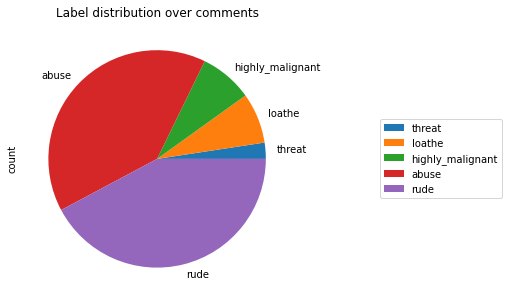

In [31]:
cols_target = ['highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')

df_distribution.plot.pie(y='count',
                         title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))  #Creating the pie plot

In [32]:
target_data = train[cols_target]
train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())


0    36263
2     1069
1      965
3      421
4      105
5        8
Name: bad, dtype: int64
0    36263
1     2568
Name: bad, dtype: int64


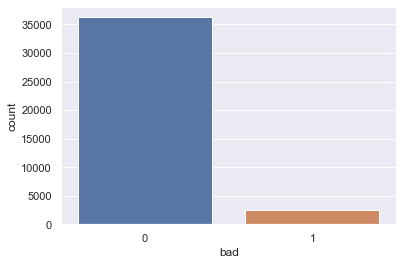

In [33]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()


In [34]:
#Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features


In [35]:
train.shape 


(38831, 12)

In [36]:
test.shape


(153164, 2)

In [37]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)


In [38]:
y_train.shape,y_test.shape


((27181,), (11650,))

In [39]:
#LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9654906000515066
Test accuracy is 0.9642918454935623
[[10870    26]
 [  390   364]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10896
           1       0.93      0.48      0.64       754

    accuracy                           0.96     11650
   macro avg       0.95      0.74      0.81     11650
weighted avg       0.96      0.96      0.96     11650



In [40]:
#DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9996320959493764
Test accuracy is 0.96
[[10678   218]
 [  248   506]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10896
           1       0.70      0.67      0.68       754

    accuracy                           0.96     11650
   macro avg       0.84      0.83      0.83     11650
weighted avg       0.96      0.96      0.96     11650



In [41]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9995953055443141
Test accuracy is 0.9718454935622317
[[10817    79]
 [  249   505]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10896
           1       0.86      0.67      0.75       754

    accuracy                           0.97     11650
   macro avg       0.92      0.83      0.87     11650
weighted avg       0.97      0.97      0.97     11650



In [42]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9677348147603105
Test accuracy is 0.9655793991416309
[[10818    78]
 [  323   431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10896
           1       0.85      0.57      0.68       754

    accuracy                           0.97     11650
   macro avg       0.91      0.78      0.83     11650
weighted avg       0.96      0.97      0.96     11650



In [43]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9437474706596519
Test accuracy is 0.9447210300429184
[[10882    14]
 [  630   124]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10896
           1       0.90      0.16      0.28       754

    accuracy                           0.94     11650
   macro avg       0.92      0.58      0.62     11650
weighted avg       0.94      0.94      0.93     11650



In [44]:
#RandomForestClassifier
#This classifier is giving the best accuracy
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9995953055443141
Test accuracy is 0.9712446351931331
cross validation score : 97.04102463589341
[[10819    77]
 [  258   496]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10896
           1       0.87      0.66      0.75       754

    accuracy                           0.97     11650
   macro avg       0.92      0.83      0.87     11650
weighted avg       0.97      0.97      0.97     11650



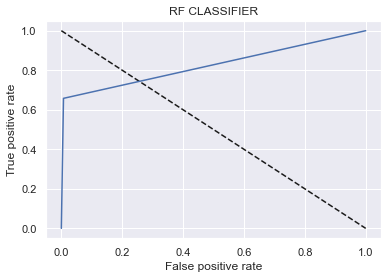

In [45]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [46]:
!pip install eli5
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest classifier
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.1110 ± 0.0988,fuck
0.0488 ± 0.0666,fucking
0.0273 ± 0.0428,shit
0.0246 ± 0.0285,suck
0.0243 ± 0.0343,bitch
0.0198 ± 0.0182,idiot
0.0190 ± 0.0217,asshole
0.0175 ± 0.0196,faggot
0.0151 ± 0.0176,dick
0.0113 ± 0.0140,stupid


In [128]:
prediction=RF.predict(test_data)
prediction


array([0, 0, 0, ..., 0, 0, 0])

In [116]:

import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(RF)
import joblib

# saving the best classification model
joblib.dump(saved_model,open('Malignant_comments_classifier.pkl','wb'))